# 🧠 NLP Disaster Tweets — Mini Project (Week 4)

This project is part of the Deep Learning Module 4 assignment.  
The goal is to classify tweets as **disaster-related (1)** or **not disaster-related (0)** using NLP techniques.

Dataset source:  
Kaggle — “NLP Getting Started” competition  
https://www.kaggle.com/competitions/nlp-getting-started


## Alexander Voit

## 1. Problem Description & Data Overview

This is a binary classification task where the goal is to determine whether a tweet is related to a real disaster (label = 1) or not (label = 0).  
The dataset contains short, noisy Twitter messages that may include hashtags, links, emojis, abbreviations, and informal language — making it a typical real-world NLP problem.

**Dataset summary:**
- Training samples: 7,613 tweets  
- Test samples: 3,263 tweets  
- Columns:
  - `id`  
  - `keyword` (may contain helpful context)  
  - `location` (optional, often noisy)  
  - `text` (main feature: the tweet itself)  
  - `target` (0 or 1, only in training set)

Next, we load the dataset and inspect its structure.


In [1]:
import pandas as pd

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

# Show basic info
train.head(), train.shape, test.shape


(   id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 (7613, 5),
 (3263, 4))

**Observation:**  
The dataset contains 7,613 rows and 5 columns.  
`keyword` and `location` have missing values, which is expected for tweets and will not prevent modeling since the main signal is in the `text` column.


## 2. Exploratory Data Analysis (EDA)

In this step, we inspect the dataset to understand its structure, identify missing values,  
explore the distribution of the target variable, and analyze tweet characteristics such as text length.

The goal of this EDA is to decide how to clean and preprocess the tweets before modeling.


### 2.1 Data Structure Overview

We begin by inspecting the dataset structure, column types, and the presence of missing values.  
This helps us understand how clean the data is and what preprocessing will be necessary.


In [2]:
# Basic information
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


**Observation:**  
The classes are slightly imbalanced: non-disaster tweets are more frequent.  
However, the imbalance is not severe and we can proceed without applying special balancing techniques.


### 2.2 Target Distribution

Next, we examine the balance between the two classes:  
- `0` → non-disaster  
- `1` → disaster  

This helps evaluate whether we need to address class imbalance.


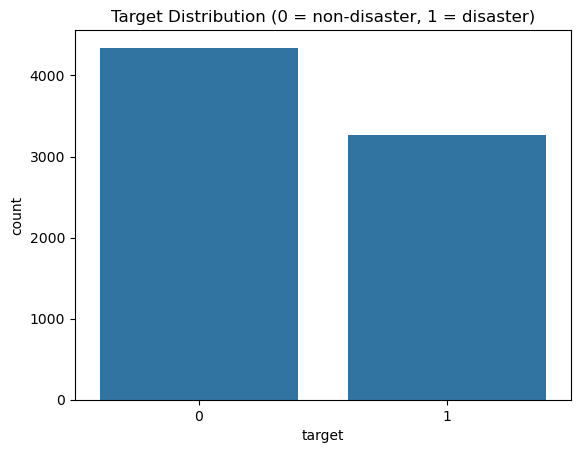

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train, x="target")
plt.title("Target Distribution (0 = non-disaster, 1 = disaster)")
plt.show()


**Observation:**  
Most tweets have between 50 and 150 characters.  
This indicates that they are short, noisy, and require cleaning but not heavy truncation.  
We will use full tweets as input for the model.


### 2.3 Tweet Length Distribution

We analyze the number of characters per tweet to understand the typical tweet size.  
This helps determine preprocessing limits such as maximum sequence length.


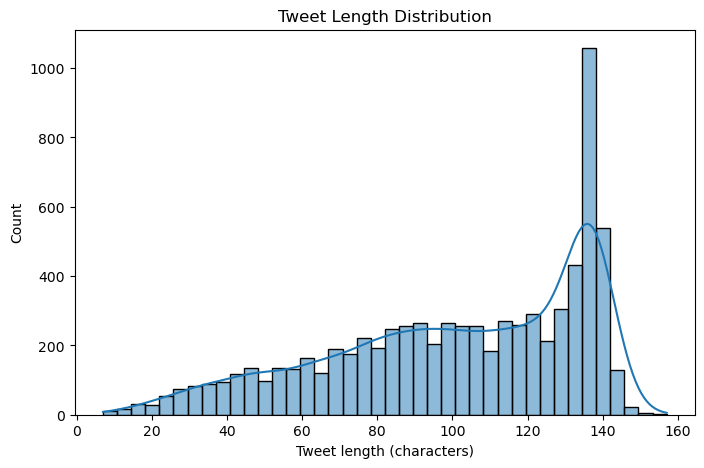

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_len, dtype: float64

In [4]:
train["text_len"] = train["text"].apply(len)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(train["text_len"], bins=40, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet length (characters)")
plt.ylabel("Count")
plt.show()

train["text_len"].describe()


**Observation:**  
Most tweets fall between 50 and 150 characters.  
The distribution is typical for Twitter data: short, noisy messages.  
We will keep full text length during preprocessing since truncation is not necessary.


In [5]:
train.isnull().sum()


id             0
keyword       61
location    2533
text           0
target         0
text_len       0
dtype: int64

**Observation:**  
`keyword` and `location` contain missing values, but these fields are optional and not critical.  
Our main feature is the tweet text, so we can proceed without filling these columns.


**Observation:**  
`keyword` and `location` contain missing values, but these fields are optional and not critical.  
Our main feature is the tweet text, so we can proceed without filling these columns.
